In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv('volusia_dataframe.csv')

In [3]:
df

,id,objectid,statefp,countyfp,tractce,blkgrpce,geoid,namelsad,mtfcc,funcstat,...,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,crime_rate,avg_hh_income,lstat
0,32,261,12,127,83203,2,1.210000e+11,Block Group 2,G5030,S,...,2663.3,308041.5,356547,3.6,301,558,1428,LOW,93688.0,0.130047
1,1806,508,12,127,82100,1,1.210000e+11,Block Group 1,G5030,S,...,1114.6,58531.3,66471,2.8,21,131,263,HIGH,21563.0,0.878620
2,5144,4440,12,127,82301,3,1.210000e+11,Block Group 3,G5030,S,...,1158.8,99391.1,118591,2.1,35,12,165,HIGH,25083.0,0.842086
3,697,4542,12,127,91026,2,1.210000e+11,Block Group 2,G5030,S,...,1672.9,176236.8,196714,3.2,335,335,902,LOW,57275.0,0.507971
4,5148,4443,12,127,90203,3,1.210000e+11,Block Group 3,G5030,S,...,1356.9,139595.3,164451,2.9,57,201,661,LOW,40625.0,0.680778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,5297,4579,12,127,82703,2,1.210000e+11,Block Group 2,G5030,S,...,1556.9,466339.8,523239,2.6,149,347,431,MED,67969.0,0.396980
285,4692,3949,12,127,80500,2,1.210000e+11,Block Group 2,G5030,S,...,1421.9,203062.9,236990,2.5,201,802,1092,MED,35329.0,0.735745
286,10026,9886,12,127,90400,5,1.210000e+11,Block Group 5,G5030,S,...,1200.2,137053.9,154601,2.7,83,143,292,MED,49667.0,0.586933
287,1787,487,12,127,82507,1,1.210000e+11,Block Group 1,G5030,S,...,1773.4,203532.7,236808,2.9,153,164,341,HIGH,44815.0,0.637291


In [4]:
# checking null values for each attribute
df.isnull().sum()

id               0
objectid         0
statefp          0
countyfp         0
tractce          0
blkgrpce         0
geoid            0
namelsad         0
mtfcc            0
funcstat         0
aland            0
awater           0
intptlat         0
intptlon         0
shape_leng       0
shape_area       0
geoid_data       0
geoid2           0
nbr_crimes       0
avg_sfla         0
avg_aprtot       0
avg_price        0
avg_rmbed        0
nbr_parcels      0
nbr_housing      0
pop              0
crime_rate       0
avg_hh_income    1
lstat            1
dtype: int64

In [5]:
df = df.loc[:,['nbr_crimes','avg_sfla','avg_aprtot','avg_price','avg_rmbed','nbr_parcels','nbr_housing','pop','avg_hh_income','crime_rate']]

In [6]:
df

,nbr_crimes,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,avg_hh_income,crime_rate
0,0,2663.3,308041.5,356547,3.6,301,558,1428,93688.0,LOW
1,42,1114.6,58531.3,66471,2.8,21,131,263,21563.0,HIGH
2,87,1158.8,99391.1,118591,2.1,35,12,165,25083.0,HIGH
3,0,1672.9,176236.8,196714,3.2,335,335,902,57275.0,LOW
4,0,1356.9,139595.3,164451,2.9,57,201,661,40625.0,LOW
...,...,...,...,...,...,...,...,...,...,...
284,19,1556.9,466339.8,523239,2.6,149,347,431,67969.0,MED
285,33,1421.9,203062.9,236990,2.5,201,802,1092,35329.0,MED
286,23,1200.2,137053.9,154601,2.7,83,143,292,49667.0,MED
287,201,1773.4,203532.7,236808,2.9,153,164,341,44815.0,HIGH


In [7]:
df.isnull().sum()

nbr_crimes       0
avg_sfla         0
avg_aprtot       0
avg_price        0
avg_rmbed        0
nbr_parcels      0
nbr_housing      0
pop              0
avg_hh_income    1
crime_rate       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

nbr_crimes       0
avg_sfla         0
avg_aprtot       0
avg_price        0
avg_rmbed        0
nbr_parcels      0
nbr_housing      0
pop              0
avg_hh_income    0
crime_rate       0
dtype: int64

In [10]:
df

,nbr_crimes,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,avg_hh_income,crime_rate
0,0,2663.3,308041.5,356547,3.6,301,558,1428,93688.0,LOW
1,42,1114.6,58531.3,66471,2.8,21,131,263,21563.0,HIGH
2,87,1158.8,99391.1,118591,2.1,35,12,165,25083.0,HIGH
3,0,1672.9,176236.8,196714,3.2,335,335,902,57275.0,LOW
4,0,1356.9,139595.3,164451,2.9,57,201,661,40625.0,LOW
...,...,...,...,...,...,...,...,...,...,...
284,19,1556.9,466339.8,523239,2.6,149,347,431,67969.0,MED
285,33,1421.9,203062.9,236990,2.5,201,802,1092,35329.0,MED
286,23,1200.2,137053.9,154601,2.7,83,143,292,49667.0,MED
287,201,1773.4,203532.7,236808,2.9,153,164,341,44815.0,HIGH


In [11]:
# Divide into two classes instead of three
df = df[df.nbr_crimes != 0]
df.loc[df['nbr_crimes'] < 300, 'crime_rate'] = 'HIGH'
df.loc[df['nbr_crimes'] < 19, 'crime_rate'] = 'LOW'

# or
#df.loc[df['nbr_crimes'] < 300, 'crime_rate'] = 'HIGH'
#df.loc[df['nbr_crimes'] < 10, 'crime_rate'] = 'LOW'

# If I would like to change the object data of the class column into an integer I will have to do the following:
#label = LabelEncoder().fit_transform(df['crime_rate'])
#df = df.drop('crime_rate', axis='columns')
#df['crime_rate']=label

C:\Users\dnaza\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\dnaza\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [12]:
df

,nbr_crimes,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,avg_hh_income,crime_rate
1,42,1114.6,58531.3,66471,2.8,21,131,263,21563.0,HIGH
2,87,1158.8,99391.1,118591,2.1,35,12,165,25083.0,HIGH
5,4,1267.2,142387.2,155418,2.7,49,134,298,35694.0,LOW
9,4,1305.9,138037.8,152733,2.9,165,518,1232,31019.0,LOW
10,2,1202.9,237435.5,265685,2.2,259,483,745,43324.0,LOW
...,...,...,...,...,...,...,...,...,...,...
284,19,1556.9,466339.8,523239,2.6,149,347,431,67969.0,HIGH
285,33,1421.9,203062.9,236990,2.5,201,802,1092,35329.0,HIGH
286,23,1200.2,137053.9,154601,2.7,83,143,292,49667.0,HIGH
287,201,1773.4,203532.7,236808,2.9,153,164,341,44815.0,HIGH


# SVM

In [13]:
#%% SVM
from sklearn import preprocessing
# Separate the y input from the x inputs for the training and test dataset
y = df.iloc[:,-1:]
X_data = df.iloc[:,1:9]

# Normalize X data
X = X_data.apply(lambda X: (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)))


In [14]:
X

,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,avg_hh_income
1,0.213961,0.013577,0.007308,0.757576,0.010289,0.096182,0.087144,0.138347
2,0.236564,0.090761,0.094336,0.545455,0.017148,0.008811,0.054672,0.179987
5,0.291997,0.171980,0.155827,0.727273,0.024008,0.098385,0.098741,0.305510
9,0.311787,0.163764,0.151344,0.787879,0.080843,0.380323,0.408217,0.250207
10,0.259115,0.351526,0.339945,0.575758,0.126899,0.354626,0.246852,0.395770
...,...,...,...,...,...,...,...,...
284,0.440143,0.783924,0.769994,0.696970,0.073003,0.254772,0.142810,0.687309
285,0.371107,0.286596,0.292032,0.666667,0.098481,0.588840,0.361829,0.301192
286,0.257735,0.161906,0.154463,0.727273,0.040666,0.104993,0.096753,0.470805
287,0.550857,0.287483,0.291728,0.787879,0.074963,0.120411,0.112989,0.413408


In [15]:
from sklearn.preprocessing import StandardScaler
# train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#  Scale Data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

clf = SVC(probability=True)

param_grid = {'C':[0.01, 0.1, 1],
              'kernel':['linear', 'rbf']}

clf = GridSearchCV(clf, param_grid, refit = True, verbose = 3)

clf.fit(X_train, y_train)

e = clf.score(X_train,y_train)

# predict
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of SVM model is:',(accuracy))

# print best parameter
print('\n')
print(clf.best_params_)
print('\n')
print(clf.best_estimator_)
print('\n')
print(e)
print('\n')

print("Train accuracy:",clf.score(X_train, y_train))
print("Test accuracy:",clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.688, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.656, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.812, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.656, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Use

[CV] ................ C=0.1, kernel=linear, score=0.656, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.656, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .

C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dnaza\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

Accuracy of SVM model is: 0.6829268292682927


{'C': 0.1, 'kernel': 'linear'}


SVC(C=0.1, kernel='linear', probability=True)


0.71875


Train accuracy: 0.71875
Test accuracy: 0.6829268292682927


In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        HIGH       0.65      0.91      0.75        22
         LOW       0.80      0.42      0.55        19

    accuracy                           0.68        41
   macro avg       0.72      0.67      0.65        41
weighted avg       0.72      0.68      0.66        41



In [17]:
#  Evaluate Model
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[20  2]
 [11  8]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

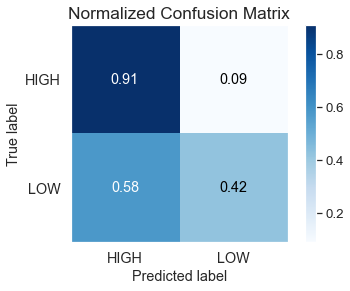

In [18]:
# Plot confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

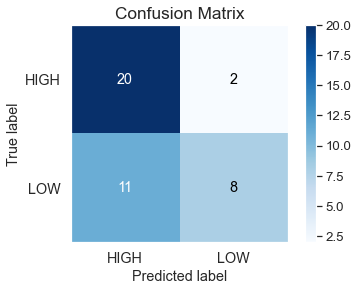

In [19]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

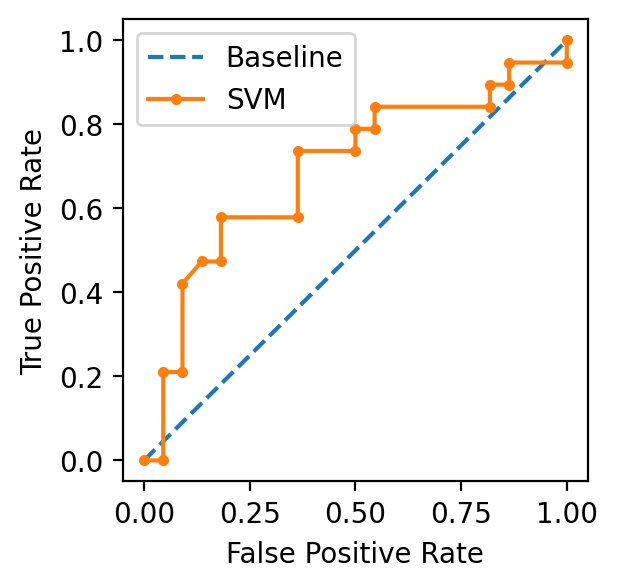

ROC AUC:   0.6925837320574163


In [20]:

import matplotlib as mpl
mpl.style.use('default')

# Actual class predictions
svm_predictions = clf.predict(X_test)
# Probabilities for each class
svm_probs = clf.predict_proba(X_test)[:, 1]
# generate a baseline prediction (majority class)
b_probs = [0 for _ in range(len(y_test))]
# calculate roc curves
b_fpr, b_tpr, _ = roc_curve(y_test, b_probs, pos_label = 'LOW')
fpr, tpr, thresh = roc_curve(y_test, svm_probs, pos_label = 'LOW')
# plot the roc curve for the model
plt.figure(figsize=(3,3), dpi = 200)
plt.plot(b_fpr, b_tpr, linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.show()

print('ROC AUC:  ', roc_auc_score(y_test, svm_probs, average = 'macro'))

In [21]:
 print(clf.best_params_)

{'C': 0.1, 'kernel': 'linear'}
